## Background / Motivation

Our group's project looks to find and analyze the variables that influence the probability of a person defaulting on their payments. We selected this topic since we believe that defaulting is an incredibly important problem that is a major issue for all parties involved.

For context, a credit card issuer is the bank or credit union that issues the credit card and services the account (Bank of America, Capital One, etc..)

Credit card networks dictate where credit cards can be used, facilitate payment processing at the point of sale and administer secondary credit card benefits. The four major card networks are Visa, Mastercard, American Express, and Discover. A credit card default is a function of credit card debt. A default occurs when someone (usually the primary cardholder) fails to pay the minimum amount due on a monthly credit card bill for several months. When a primary credit cardholder defaults, it can have impacts on both the borrower and lender.

## Problem statement 

Our objective is to develop a model that accurately assesses the relationship between defaulting with other financial and demographic factors. 

We are looking at this as a classification problem, and the goal of our analysis is to analyze the probability of a person defaulting on their payments. This is a combination of an inference and a prediction problem. We want to assess the underlying relationships between a person’s financial information variables. At the same time, we want to predict their probability of defaulting on a credit card payment. 

There is the possibility that we will have to engage in variable selection, based on initial research on our dataset that several variables could be correlated. Lastly, for our model, it will be important to minimize false negative rate, which is the probability of missing a default client that can lead to great loss for the bank. 

## Data sources

Our dataset contains information on demographics, defaulted payments, repayment statuses, payment histories, and bill statements. This data was collected from credit card clients in Taiwan from April 2005 to September 2005. Each of the 30000 rows represents a unique credit card client while each of the 25 columns represents demographic and financial information. The y-variable "default payment next month" tells us whether someone defaulted on a loan. 

Most of the variables (payment histories, repayment statuses, and bill statements) are broken up into several columns based on their statuses within each month between April to September. For example, Column 1 may be looking at the repayment status as of April while Column 2 may be looking at the repayment status as of May. Lastly, repayment status operates using a scale from -1 to 9. -1 means that the client has paid on time while 1 means that they have delayed their payments for 1 month. This scale increases until 9 which means payment delays for 9 months or more.


Link: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

## Stakeholders

Our two primary stakeholders will be Bank/Credit Unions (those that lend money) and Primary Cardholders (those who borrow money). Both of these stakeholders have potential for gain and loss depending on if they default or not. 

For Banks and Credit Unions, successfully loaning out money to people that will not default will lead to new reliable customers along with money being earned through interest. However, loaning out money to those that do default will lead to money being lost and potential bank failure/insolvency.

For Primary Cardholders, getting a loan without defaulting will lead to money that can be used to pay for important goods (cars and houses). However, defaulting will lead to a lower credit score, reduced ability to get future loans, and potential property seizure for auction by the loaners.

## Data quality check / cleaning / preparation 

**See Appendix A and B for distribution tables of both continuous and categorical variables.**

The tables in the appendix show the categorical levels after some necessary data cleaning. For a few of the categorical variables like education and marriage, some values belonged to unknown categories. Given that these values made up a small proportion of all education/marriage values, we merged them into the "others" category for each. Additionally, instead of keeping the categorical columns as is, we converted the different levels into dummy columns to give them equal weight in the modeling process.

After encoding these categorical variables, we dropped one dummy level from each to avoid issues with collinearity in the stepwise selection process. We initially chose to drop the "other" categories for education and marriage, but after examining VIF values we found it more impactful to drop one of the more popular levels such as "single" and "graduate_school".

Additionally, we conducted some feature engineering to rid the dataset of problematic multicollinearity based on an analysis of VIF values. The dataset originally contained the credit card bills for each person from April to September, but these columns had VIF values over 20. To solve this, we created a new predictor that took the average credit card bill per month for each person for this time span and dropped the monthly bill columns.

## Exploratory data analysis

- Based on boxplots and an analysis of Feature Importance: repay statuses (especially in later months like September and August) show a potential impact on the probability of credit card default. It is hard to discern noticeable effects from any of the categorical variables.

- Demographic variables (Sex, Marriage Status, and Education) apart from age do not seem too important based on the Feature Importance check. In fact, the bottom 6 variables out of the 21 variables are all demographic factors. 

- There was a general increase in terms of repayment amounts from May (4799.39 dollars) to September (5663.58 dollars).

- Generally speaking, the financial variables seem to be potentially more impactful than the demographic variables. 

**See Appendices C-F for visualizations**

## Approach

We chose to use a logistic model because the y-variable only had two options - 1 for defaulting and 0 for not defaulting. A logistic model also allows us to meet our objectives of analyzing the probability of someone defaulting on their loans. 

For performance metrics, we chose to focus primarily on minimizing False Negatives which meant maximizing Recall (TP/(TP+FN)). The reason for this is because False Negatives are customers that we gave loans believing that they wouldn't default that ended up defaulting. This is significantly worse than False Positives (customers that didn't get loans that wouldn't have defaulted) because False Negative customers will have a damaged credit score while the loaners will also lose money and risk bank failure. However, we would also like to balance out maximizing recall with maximizing Classification Accuracy since banks need to successfully loan money to make interest while customers need loans to purchase necessary goods. 

There wasn't anything too unorthodox with our approach. We peformed an EDA and data manipulation before utilizing variable selection in the form of backwards/forwards selection and a lasso regression. 

We did use some inspiration from Kaggle solutions and YouTube videos to get an idea of how to perform some data cleaning and analyze feature importances. For example - this solution [1] helped us gain the insight that some of the values associated with the categorical variables weren't properly classified and this YouTube video [2] introduced us to a feature importance algorithm that we used to gain an idea of what might be the most useful predictors of credit card default probability.

One problem that we anticipated and encountered was strong correlation among some of the predictors. Since a few of our variables were measuring the same things, but only a month apart each, there was relatively strong correlation among a few variables including the repayment statuses. This led to some problems with the very first model we tries since multicollinearity is a major issue for inference problems. As a result, we had to adjust the data by removing several highly correlated variables and taking the average among the ones that remained. 

Our project did not utilize any past solutions that influenced our modeling process.

## Developing the model

Explain the steps taken to develop and improve the base model - informative visualizations / addressing modeling assumption violations / variable transformation / interactions / outlier treatment / influential points treatment / addressing over-fitting / addressing multicollinearity / variable selection - stepwise regression, lasso, ridge regression). 

Did you succeed in achieving your goal, or did you fail? Why?

**Put the final model equation**.

**Important: This section should be rigorous and thorough. Present detailed information about decision you made, why you made them, and any evidence/experimentation to back them up.**

## Limitations of the model with regard to inference / prediction

If it is inference, will the inference hold for a certain period of time, for a certain subset of population, and / or for certain conditions.

If it is prediction, then will it be possible / convenient / expensive for the stakeholders to collect the data relating to the predictors in the model. Using your model, how soon will the stakeholder be able to predict the outcome before the outcome occurs. For example, if the model predicts the number of bikes people will rent in Evanston on a certain day, then how many days before that day will your model be able to make the prediction. This will depend on how soon the data that your model uses becomes available. If you are predicting election results, how many days / weeks / months / years before the election can you predict the results. 

When will your model become too obsolete to be useful?

There are several limitations to the model that derive from the data selected. Regarding inference, the data collected was from 2005 which is nearly 2 decades ago. Many changes likely have occured since 2005 (Ex: 2008 financial crisis), especially in banking that may impact the inferences made from this model. The data also stems from only Taiwan which may make it difficult for us to apply the takeaways to other countries that have different banking structures and regulations. 

Regarding predictions, it should not be too expensive or inconvenient to collect data on the predictors. Most banks and loaning agencies likely have pre-existing customers that they can use as data points without much issue. However, our model does utilize several variables that would require the consumer to have taken out previous loans. For example, our repayment status variables measure the information of consumers throughout a 6 month time stretch in the past. Ideally, we would be utilizing this model on pre-existing consumers that are looking to take out another loan. As a result, it will be difficult to use this model on first-time customers in order to predict their probability of default. 

These restrictions may make it obsolete for new banks and loaning agencies that do not have a vast consumer base already in place. They would likely have to make adjustments to the model by removing the varaibles on financial information only attainable from past borrowers. However, banks that do run the model on past borrowers will likely be able to better predict default probability since many of these predictors are easily attainable from a bank.

## Conclusions and Recommendations to stakeholder(s)

What conclusions do you draw based on your model? If it is inference you may draw conclusions based on the coefficients, statistical significance of predictors / interactions, etc. If it is prediction, you may draw conclusions based on prediction accuracy, or other performance metrics.

How do you use those conclusions to come up with meaningful recommendations for stakeholders? The recommendations must be action-items for stakeholders that they can directly implement without any further analysis. Be as precise as possible. The stakeholder(s) are depending on you to come up with practically implementable recommendations, instead of having to think for themselves.

If your recommendations are not practically implementable by stakeholders, how will they help them? Is there some additional data / analysis / domain expertise you need to do to make the recommendations implementable? 

Do the stakeholder(s) need to be aware about some limitations of your model? Is your model only good for one-time use, or is it possible to update your model at a certain frequency (based on recent data) to keep using it in the future? If it can be used in the future, then for how far into the future?

## GitHub and individual contribution {-}

Put the **Github link** for the project repository.

OUR GITHUB LINK: https://github.com/Dmjohnson4/Team-Project/tree/b3f576a2a1c385042553fc629772ae5b6c9fb5c6

Add details of each team member's contribution in the table below.

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 50%;">
       <col span="1" style="width: 15%;"> 
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Contributed aspects</th>
    <th>Details</th>
    <th>Number of GitHub commits</th>
  </tr>
  <tr>
    <td>Davis Johnson</td>
    <td>Data cleaning, preparation, and EDA</td>
    <td>Performed every task up to the actual model development. Developd backward selection model.</td>
    <td>100</td>
  </tr>
  <tr>
    <td>Kaitlin Sun</td>
    <td>Modeling and Interactions</td>
    <td>Checked and addressed modeling assumptions and identified relevant variable interactions. Developed initial model and helped develop Lasso model as well. </td>
    <td>120</td>
  </tr>
    <tr>
    <td>Andy Wen</td>
    <td>Outlier, variable selection, and transformations</td>
    <td>Identified outliers/influential points and analayzed their effects on the model. Developed forward selection model (ended up selecting backward selection model). Identified potential transformations through looking at variable relationships</td>
    <td>130</td>    
  </tr>
    <tr>
</table>

Overall, we thought that Github provided an efficient space for sharing and collaboration. However, it's still something that we are unfamiliar with and probably could've used it a more effficient manner. For example, we mostly justed pushed our updated files onto the same branch when we probably each should have had individual branches. We also had a hard time initially trying to figure out how to download the files as .ipynb's but eventually managed to solve this problem.

## References {-}

List and number all bibliographical references. When referenced in the text, enclose the citation number in square brackets, for example [1].

[1] https://www.kaggle.com/code/bansodesandeep/credit-card-default-prediction

[2] https://www.youtube.com/watch?v=NPdn3YPkg9w&t=1455s

## Appendix {-}

### <html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h3>[A] CONTINUOUS VARIABLE DISTRIBUTION</h3>

<table style="width:200%">
     <colgroup>
       <col span="1" style="width: 200%;">
       <col span="1" style="width: 200%;">
       <col span="1" style="width: 200%;">
       <col span="1" style="width: 200%;">
       <col span="1" style="width: 200%;">
       <col span="1" style="width: 200%;">
       <col span="1" style="width: 200%;">
       <col span="1" style="width: 200%;">
       <col span="1" style="width: 200%;">
       <col span="1" style="width: 200%;">
       <col span="1" style="width: 200%;">
       <col span="1" style="width: 200%;">
       <col span="1" style="width: 200%;">
       <col span="1" style="width: 200%;">
    </colgroup>
  <tr>
    <th>statistic</th>  
    <th>limit_bal</th>
    <th>age</th>
    <th>repay_status_sept</th>
    <th>repay_status_aug</th>
    <th>repay_status_jul</th>
    <th>repay_status_jun</th>
    <th>repay_status_may</th>
    <th>repay_status_apr</th>
    <th>pay_amt_sept</th>
    <th>pay_amt_aug</th>
    <th>pay_amt_jul</th>
    <th>pay_amt_jun</th>
    <th>pay_amt_may</th>
    <th>pay_amt_apr</th>
  </tr>
  <tr>
    <td>COUNT</td>
    <td>30000</td>
    <td>30000</td>
    <td>30000</td>
    <td>30000</td>
    <td>30000</td>
    <td>30000</td>
    <td>30000</td>
    <td>30000</td>
    <td>30000</td>
    <td>30000</td>
    <td>30000</td>
    <td>30000</td>
    <td>30000</td>
    <td>30000</td>
  </tr>
  <tr>
    <td>MEAN</td>
    <td>167484.322667</td>
    <td>35.485500</td>
    <td>-0.016700</td>
    <td>-0.133767</td>
    <td>-0.166200</td>
    <td>-0.220667</td>
    <td>-0.266200</td>
    <td>-0.291100</td>
    <td>5663.580500</td>
    <td>5.921163e+03</td>
    <td>5225.68150</td>
    <td>4826.076867</td>
    <td>4799.387633</td>
    <td>5215.502567</td>
  </tr>
    <tr>
    <td>STD</td>
    <td>129747.661567</td>
    <td>9.217904</td>
    <td>1.123802</td> 
    <td>1.197186</td> 
    <td>1.196868</td> 
    <td>1.169139</td> 
    <td>1.133187</td> 
    <td>1.149988</td> 
    <td>16563.280354</td> 
    <td>2.304087e+04</td> 
    <td>17606.96147</td> 
    <td>15666.159744</td> 
    <td>15278.305679</td> 
    <td>17777.465775</td> 
  </tr>
    <tr>
    <td>MIN</td>
    <td>10000</td>
    <td>21</td>
    <td>-2</td>
    <td>-2</td>
    <td>-2</td>
    <td>-2</td>
    <td>-2</td>
    <td>-2</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
  </tr>
    <tr>
    <td>25%</td>
    <td>50000</td>
    <td>28</td>
    <td>-1</td> 
    <td>-1</td> 
    <td>-1</td>
    <td>-1</td> 
    <td>-1</td> 
    <td>-1</td> 
    <td>1000</td> 
    <td>8.33e+02</td> 
    <td>390</td>
    <td>296</td>
    <td>252.5</td> 
    <td>117.75</td> 
  </tr>
    <tr>
    <td>50%</td>
    <td>140000</td>
    <td>34</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>2100</td>
    <td>2009</td>
    <td>1800</td>
    <td>1500</td>
    <td>1500</td>
    <td>1500</td>
  </tr>
    <tr>
    <td>75%</td>
    <td>240000</td>
    <td>41</td>
    <td>0</td>
    <td>0</td> 
    <td>0</td> 
    <td>0</td> 
    <td>0</td> 
    <td>0</td>
    <td>5006</td>
    <td>5000</td>
    <td>4505</td>
    <td>4013.25</td>
    <td>4031.5</td>
    <td>4000</td> 
  </tr>
    <tr>
    <td>MAX</td>
    <td>10000000</td>
    <td>79</td>
    <td>8</td>
    <td>8</td>
    <td>8</td>
    <td>8</td>
    <td>8</td>
    <td>8</td>
    <td>873552</td>
    <td>1.684259e+06</td>
    <td>896040</td>
    <td>621000</td>
    <td>426529</td>
    <td>528666</td>
  </tr>
    <tr>
</table>

### <html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h3>[B] CATEGORICAL VARIABLE DISTRIBUTION</h3>

<table style="width:150%">
     <colgroup>
       <col span="1" style="width: 200%;">
       <col span="1" style="width: 200%;">
       <col span="1" style="width: 200%;">
       <col span="1" style="width: 200%;">
    </colgroup>
  <tr>
    <th>statistic</th>  
    <th>marriage</th>
    <th>education</th>
    <th>sex</th>
  </tr>
  <tr>
    <td>Null Value Count</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
  </tr>
  <tr>
    <td>Unique Value Count</td>
    <td>3</td>
    <td>4</td>
    <td>2</td>
  </tr>
    <tr>
    <td>Frequency of Levels</td>
    <td>married: 13659, single: 15964, other: 377</td>
    <td>graduate school: 10585, university: 14030, high school: 4917, other: 468</td>
    <td>male: 11888, female: 18112</td> 
  </tr>
    <tr>
</table>

<h3>[C] Distribution of Limit Balance by Default Class</h3>

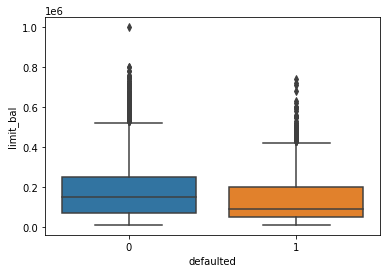

<h3>[D] Distribution of September Repay Status by Default Class</h3>

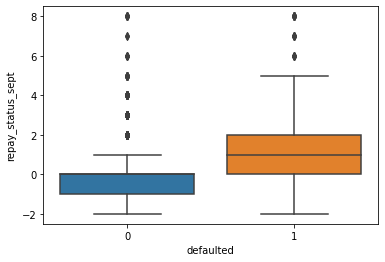

<h3>[E] Distribution of August Repay Status by Default Class</h3>

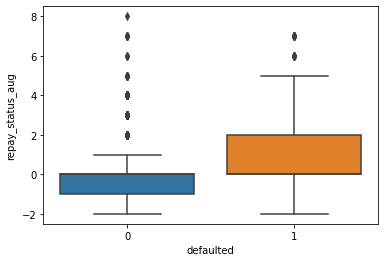

<h3>[F] Distribution of July Repay Status by Default Class</h3>


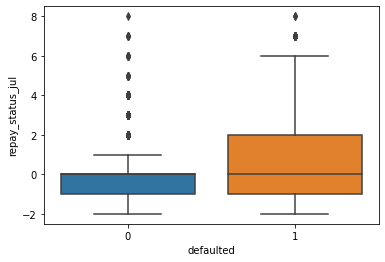

<h3>[G] Feature Importance DataFrame</h3>

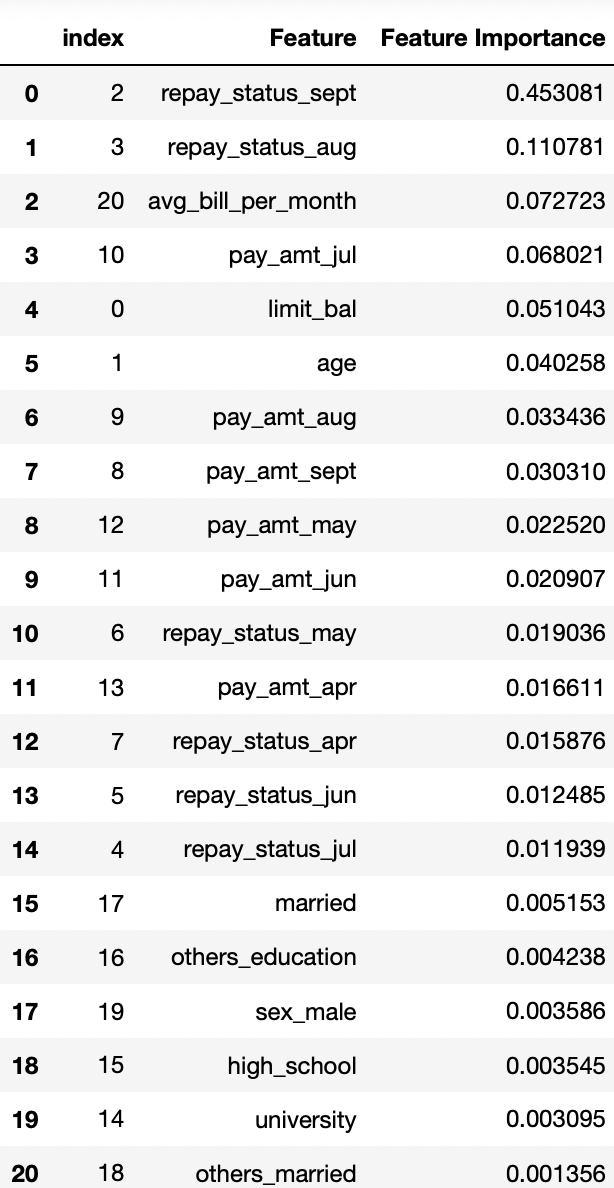